In [1]:
!nvidia-smi

Mon Nov 11 04:32:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 36.9 MB/s eta 0:00:00


In [3]:
from fastai.vision.all import *
from ultralytics import YOLO
from PIL import ImageDraw
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
car_color_model = load_learner('/content/car_color_model.pkl')

In [8]:
person_detection_model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 116MB/s]


In [9]:
def predict_car_color_and_people(img_path):
    # Load the image
    img = PILImage.create(img_path)

    # Step 1: Predict car color using the car color model
    car_pred, car_pred_idx, car_probs = car_color_model.predict(img)

    # Draw bounding box for car color
    img_with_boxes = img.copy()
    draw = ImageDraw.Draw(img_with_boxes)
    car_box_color = "red" if car_pred == "blue" else "blue"
    draw.rectangle([(10, 10), (img.width - 10, img.height - 10)], outline=car_box_color, width=5)

    # Step 2: Detect people using YOLO
    results = person_detection_model(img_path)

    # Filter for "person" class detections (class 0 in YOLO for COCO dataset)
    people_count = sum([1 for result in results[0].boxes if result.cls == 0])  # Count people detections

    # Display the image and results
    plt.figure(figsize=(8, 8))
    plt.imshow(img_with_boxes)
    plt.axis('off')
    plt.title(f'Car Color: {car_pred}, Probability: {car_probs[car_pred_idx]:.4f}, People Detected: {people_count}')
    plt.show()


image 1/1 /content/mannexttoblue.jpg: 448x640 1 person, 1 boat, 118.8ms
Speed: 13.2ms preprocess, 118.8ms inference, 1708.1ms postprocess per image at shape (1, 3, 448, 640)


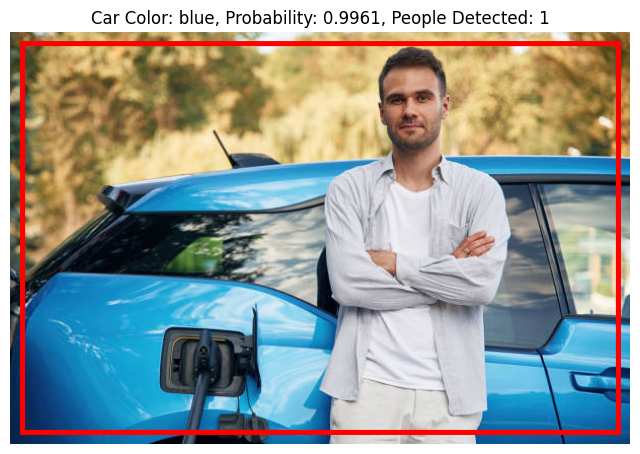

In [10]:
img_path = '/content/mannexttoblue.jpg'  # Adjust to any test image path
predict_car_color_and_people(img_path)